In [1]:
%matplotlib inline
import seaborn as sns

[5.616296558380127, 3.8887368116378784, 3.6996368880271913, 3.6694794278144838, 3.6726005544662477, 3.673545253753662, 3.582434242248535, 3.4582537159919737, 3.4720273847579954, 3.5005046844482424, 3.4125959787368774, 3.4144108386039735, 3.492608552455902, 3.4051511578559874, 3.39269505739212, 3.3770135655403135, 3.4001017322540283, 3.404614178657532, 3.3309652705192567, 3.2891473083496092]


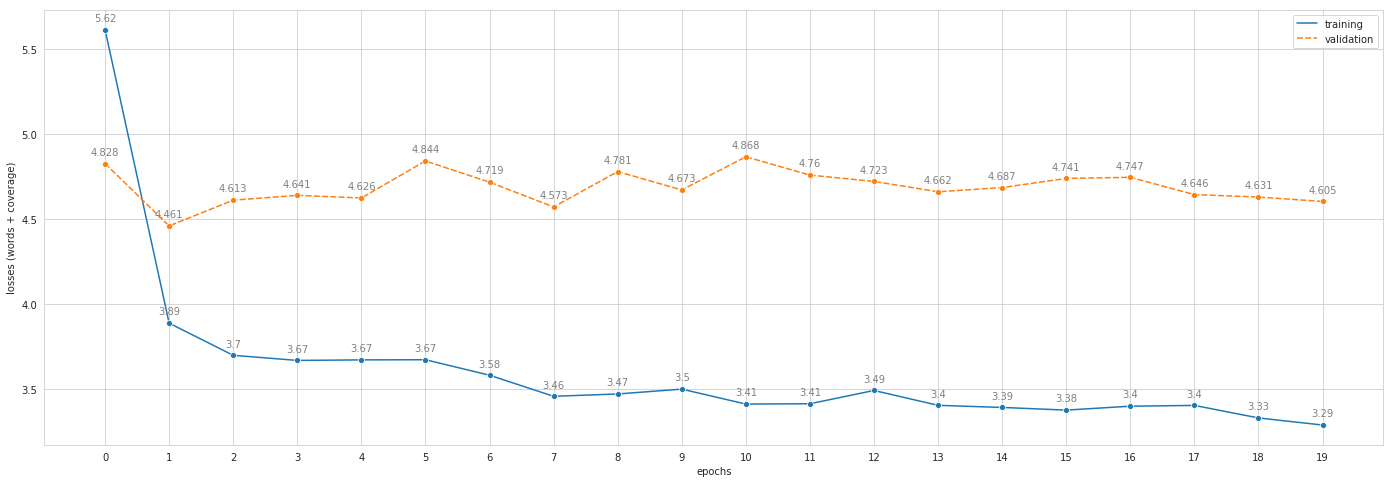

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import json
_data = None
sns.set_style("whitegrid")
with open("./Summarizer_training_cycle.json", "r") as f:
    _data = json.loads(f.read())
trg = _data["training_losses"]
print(trg)
data = _data["validation_losses"]
acc = np.round(_data["training_losses"],3).tolist()
#evid = np.round(_data["evidence_accuracy"],4)
labels = len(data)
width = len(data)
if (width < 12):
    width = 12
plt.figure(figsize=(width*1.2, 8))
ticks = range(width)
while (len(data) < width):
    data.append(None)
    trg.append(None)
    acc.append(None)
#acc = np.round(acc, 3)
import pandas as pd
df = pd.DataFrame({
    "training":trg,
    "validation":data
})
sizes = {
    "validation":1,
    "training":5
}
g = sns.lineplot(data=df, marker="o", hue="event", style="choice")
g.set(xticks = range(len(data)))
g.set(xlabel = "epochs")
axes = g.axes
#axes.set_ylim(0.3, 1)
g.set(ylabel = "losses (words + coverage)")
for i in range(labels):
    g.text(i, data[i]+0.05, 
           str(np.round([data[i]], 3)[0]),  
           horizontalalignment='center', 
           size='medium', 
           color='gray', weight='light')

    g.text(i, acc[i]+0.05,
          str(np.round(acc[i],2)),
          horizontalalignment='center',
          color="gray", weight="light")